# Predictive maintenance of a CNC milling machine

In machine cutting processes, in order to ensure surface finish quality, it is imperative to keep the tool used in top operative condition. One approach to monitor the machine wear is to measure certain process parameters, such as cutting force, tool vibration and acoustics emissions.

## The data source

The data was collected from a high speed CNC (computer numerical control) machine (Röders Tech RFM760) cutting stainless steel (HRC52). A platform dynamometer was used for measuring cutting force, three accelerometer was mounted to detect tool vibration in different directions, and a specialised sensor monitored the acoustic emission levels. The outputs of these sensors were caputred by corresponding signal conditioning accessories.


| ![picture showing sensor equipment locations on a high speed cnc milling machine](../notebooks/figures/milling_machine_setup.jpeg) |
|:--:|
| Sensor equipment locations on a high speed cnc milling machine <br> (Source: __[Li, X., S. Lim, B., H. Zhou, J., Huang, S., J. Phua, S., C. Shaw, K., & J. Er, M. (2021). Fuzzy Neural Network Modelling for Tool Wear Estimation in Dry Milling Operation. Annual Conference of the PHM Society](https://papers.phmsociety.org/index.php/phmconf/article/view/1403)__) |

## The data set

The data set consists of .csv (comma separated value) files and can be downloaded in a compressed folder (.zip). Following extraction (unzipping), there are six individual cutter records (folders c1-c6) out of which:
- c1, c4 and c6 are for training
- c2, c3 and c5 are for testing

Each training record contains a subfolder (named identical to the parent folder) and a wear file. Within the subfolder, 315 files contain the data of a single cut (one file for each cut). In these files:
- Column 1: Force (N) in X dimension
- Column 2: Force (N) in Y dimension
- Column 3: Force (N) in Z dimension
- Column 4: Vibration (g) in X dimension
- Column 5: Vibration (g) in Y dimension
- Column 6: Vibration (g) in Z dimension
- Column 7: AE-RMS (V)*
<br>
*AE-RMS means: effective average value of an acoustic emission signal

### Data importing and preprocessing

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


Loading data for a single cut in the 4th cutting record set

In [14]:
df_cut = pd.read_csv('../notebooks/data_phm2010/raw/c4/c4/c_4_001.csv', sep=',', header=None)

Chewcking data for null or missing values:

In [18]:
df_cut.isnull()

,0,1,2,3,4,5,6
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
165592,False,False,False,False,False,False,False
165593,False,False,False,False,False,False,False
165594,False,False,False,False,False,False,False
165595,False,False,False,False,False,False,False


In [19]:
df_cut.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

Based on the results, no null or missing data are detected in the file.

First ten rows of the data set:

In [16]:
df_cut.head(10)

,0,1,2,3,4,5,6
0,0.916,4.370,-1.372,0.102,0.041,0.069,0.018
1,0.892,3.955,-1.277,0.015,-0.099,-0.066,0.018
2,0.908,3.334,-1.193,0.033,-0.098,-0.059,0.018
3,1.013,3.022,-1.082,0.151,0.015,0.035,0.018
4,1.111,2.970,-1.103,-0.048,-0.175,-0.171,0.019
5,1.302,3.043,-1.089,0.011,-0.085,-0.097,0.018
6,1.552,3.017,-1.052,0.066,-0.002,-0.036,0.019
7,1.832,2.796,-0.933,0.002,-0.028,-0.075,0.019
8,2.127,2.521,-0.749,0.011,0.041,-0.022,0.019
9,2.354,2.311,-0.623,-0.038,0.012,-0.056,0.019


### Visualisation of signal types

According to the competition description, measurements were aquired every 0.02 ms.

In [55]:
n = df_cut[0].shape[0] # number of measurements
t = 0.02*np.arange(n) # time in miliseconds

### Force measured

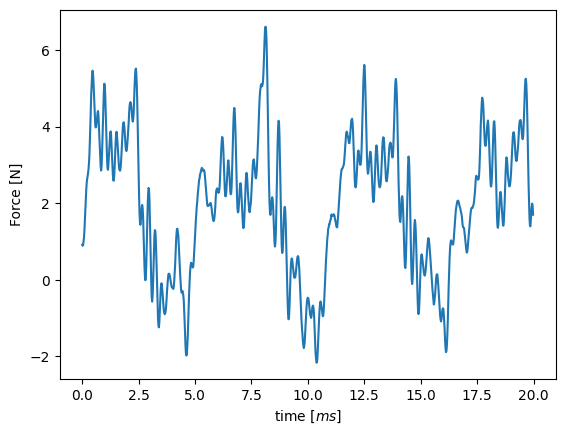

In [77]:
plt.plot(t[:1000],df_cut[0][:1000]) # plotting an slice of only 1000 out of the total number of entries
plt.xlabel(r'time [$ms$]')
plt.ylabel(r'Force [N]')
plt.show()

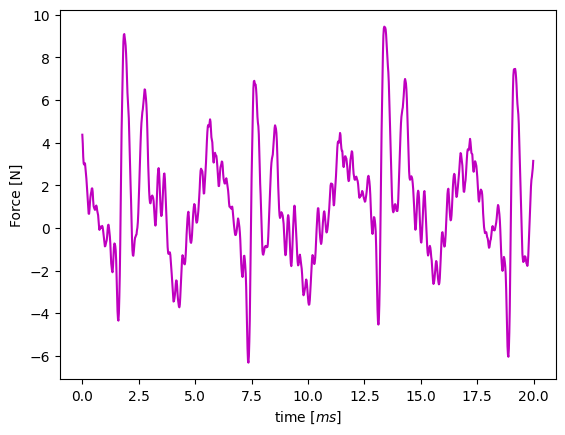

In [78]:
plt.plot(t[:1000],df_cut[1][:1000], 'm') # plotting an slice of only 1000 out of the total number of entries
plt.xlabel(r'time [$ms$]')
plt.ylabel(r'Force [N]')
plt.show()

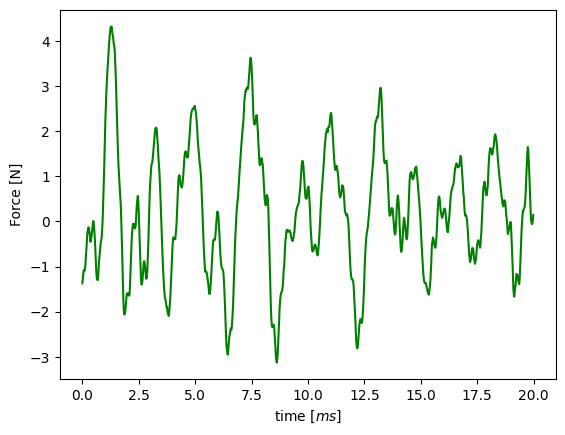

In [79]:
plt.plot(t[:1000],df_cut[2][:1000], 'g') # plotting an slice of only 1000 out of the total number of entries
plt.xlabel(r'time [$ms$]')
plt.ylabel(r'Force [N]')
plt.show()

### Vibration measured

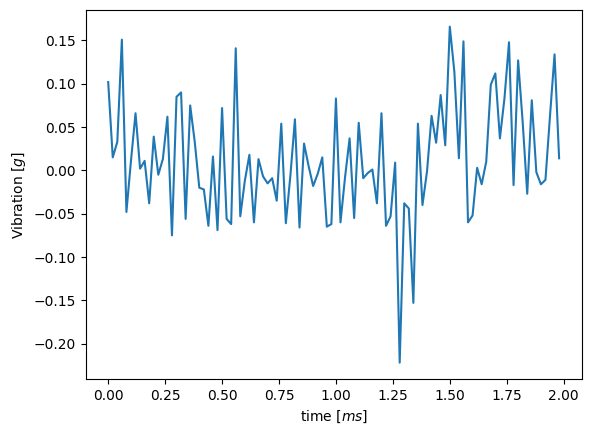

In [80]:
plt.plot(t[:100],df_cut[3][:100]) # plotting an slice of only 100 out of the total number of entries
plt.xlabel(r'time [$ms$]')
plt.ylabel(r'Vibration [$g]$')
plt.show()

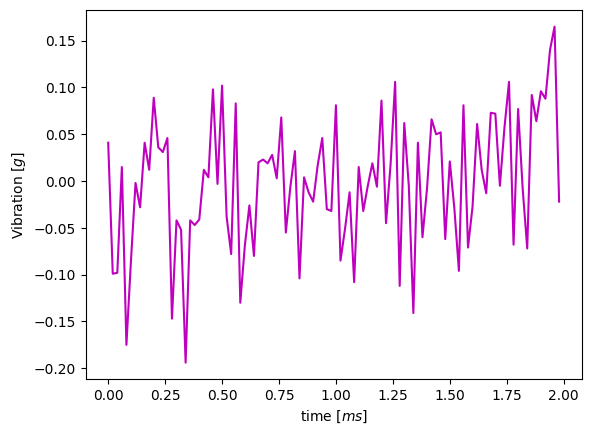

In [81]:
plt.plot(t[:100],df_cut[4][:100], 'm') # plotting an slice of only 100 out of the total number of entries
plt.xlabel(r'time [$ms$]')
plt.ylabel(r'Vibration [$g]$')
plt.show()

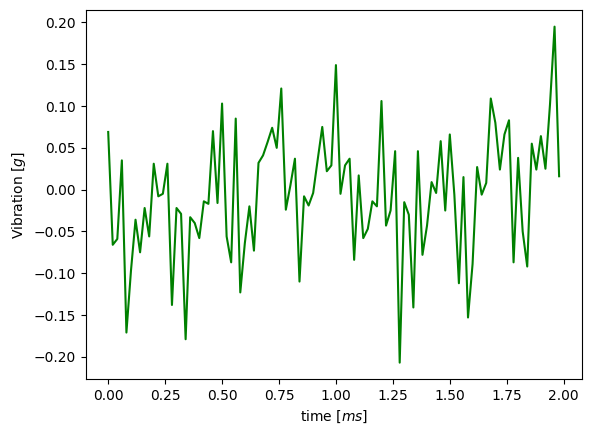

In [82]:
plt.plot(t[:100],df_cut[5][:100], 'g') # plotting an slice of only 100 out of the total number of entries
plt.xlabel(r'time [$ms$]')
plt.ylabel(r'Vibration [$g]$')
plt.show()

### Acoustic emission measured

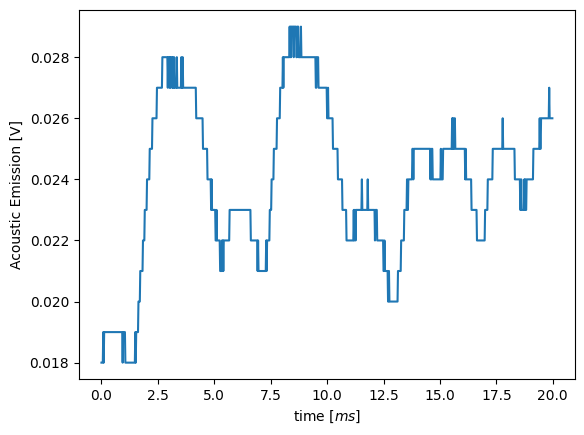

In [83]:
plt.plot(t[:1000],df_cut[6][:1000]) # plotting an slice of only 1000 out of the total number of entries
plt.xlabel(r'time [$ms$]')
plt.ylabel(r'Acoustic Emission [V]')
plt.show()